In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import time
import sys
from docx import Document
from docx.shared import Inches
class Intergrate:
    def __init__(self,fun,a,b,model,accuracy):#输入函数，左右限
        self.fun=fun
        self.a=float(a)#左
        self.b=float(b)#右
        self.model=int(model)
        self.accuracy=float(accuracy)
    def warning(self):#警告函数
        if self.a>self.b:
            print("积分左右限不对")
    def rect(self,n):#矩形法
        h=(self.b-self.a)/n
        sum=0
        for ii in range(0,n):
            sum=sum + self.fun(self.a+(ii+0.5)*h)
        return sum*h
    
    def trapezium(self,n):#梯形法
        h=(self.b-self.a)/n
        sum=(self.fun(self.a)+self.fun(self.b))
        for ii in range(1,n):
            sum=sum + 2*self.fun(self.a+ii*h)
        return sum*h/2
    
    def simpson(self,n):#辛普森法
        h=(self.b-self.a)/n
        sum=self.fun(self.a)*0.5
        for ii in range(1,n):
            sum =sum +self.fun(self.a+ii*h)
        sum =sum +self.fun(self.b)*0.5    
        sumid =0
        for ii in range(1,n+1):
            sumid=sumid + self.fun(self.a+(ii-0.5)*h)
        return (sum+2*sumid)*h/3.0
    
    def gauss1(self,n):#高斯_勒让德法
        sum=0
        if n==1:
            clist=[2]
            xlist=[0]
        elif n==2:
            clist=[1,1]
            xlist=[-0.577350269,0.577350269]
        elif n==3:
            clist=[0.5555556,0.8888889,0.5555556]
            xlist=[-0.774596669,0.0,0.774596669]
        elif n==4:
            clist=[0.3478548,0.6521452,0.6521452,0.3478548]
            xlist=[-0.861136312,-0.339981044,0.339981044,0.861136312]
        elif n==5:
            clist=[0.2369269,0.4786287,0.5688889,0.4786287,0.2369269]
            xlist=[-0.906179846,-0.538469310,0.0,0.538469310,0.906179846]
        elif n==6:
            clist=[0.1713245,0.3607616,0.4679139,0.4679139,0.3607616,0.1713245]
            xlist=[0.932469514,-0.661209386,-0.238619186,0.238619186,0.661209386,-0.932469514]
        else:
            print("n too big")
        for i in range(len(clist)):
            sum=sum+clist[i]*self.fun((self.b-self.a)/2*xlist[i]+(self.a+self.b)/2)
        sum=sum*(self.b-self.a)/2
        return sum
    
    def gauss(self,n):#高斯法
        sum=0
        cax=xishu(self.a,self.b,n)
        clist=list(cax[0:n])
        xlist=list(cax[n:len(cax)])
        for i in range(len(clist)):
            sum=sum+float(clist[i])*self.fun(float(xlist[i]))
        return sum
    
    def gauss3(self,n1):#分区间高斯算法
        sum1=0
        a1=self.a
        n=3
        sumlist=[]
        if n==1:
            clist=[2]
            xlist=[0]
        elif n==2:
            clist=[1,1]
            xlist=[-0.577350269,0.577350269]
        elif n==3:
            clist=[0.5555556,0.8888889,0.5555556]
            xlist=[-0.774596669,0.0,0.774596669]
        elif n==4:
            clist=[0.3478548,0.6521452,0.6521452,0.3478548]
            xlist=[-0.861136312,-0.339981044,0.339981044,0.861136312]
        elif n==5:
            clist=[0.2369269,0.4786287,0.5688889,0.4786287,0.2369269]
            xlist=[-0.906179846,-0.538469310,0.0,0.538469310,0.906179846]
        elif n==6:
            clist=[0.1713245,0.3607616,0.4679139,0.4679139,0.3607616,0.1713245]
            xlist=[0.932469514,-0.661209386,-0.238619186,0.238619186,0.661209386,-0.932469514]
        else:
            print("n too big")
        h=(self.b-self.a)/n1
        for ii in range(1,n1+1):
            sum1=0
            down=a1
            a1=self.a+ii*h
            up=a1
            for i in range(len(clist)):
                sum1=sum1+clist[i]*self.fun((up-down)/2*xlist[i]+(up+down)/2)
            sum1=sum1*(up-down)/2
            sumlist.append(sum1)
            
        return sum(sumlist)
    
    def iteration(self,itermin,itermax):#自适应迭代算法
        itermin=int(itermin)
        itermax=int(itermax)
        n=2
        err=sys.float_info.max
        iterlist=[]
        nlist=[]
        resultlist=[]
        chalist=[]
        if self.model==0:            
            origin=self.rect(n)
            while err>self.accuracy and itermin<itermax:
                n=n*2
                new=self.rect(n)
                err=abs(new-origin)
                nlist.append(n)
                resultlist.append(new)
                iterlist.append(itermin)
                chalist.append(err)
                itermin=itermin+1
                origin=new
        elif self.model==1:
            origin=self.trapezium(n)
            while err>self.accuracy and itermin<itermax:
                n=n*2
                new=self.trapezium(n)
                err=abs(new-origin)
                nlist.append(n)
                resultlist.append(new)
                iterlist.append(itermin)
                chalist.append(err)
                itermin=itermin+1
                origin=new
        elif self.model==2:
            origin=self.simpson(n)
            while err>self.accuracy and itermin<itermax:
                n=n*2
                new=self.simpson(n)
                err=abs(new-origin)
                nlist.append(n)
                resultlist.append(new)
                iterlist.append(itermin)
                chalist.append(err)
                itermin=itermin+1
                origin=new
        elif self.model==3:
            n=2
            origin=self.gauss1(n)
            while err>self.accuracy and itermin<itermax or n<5:                
                n=n+1
                new=self.gauss1(n)
                err=abs(new-origin)
                nlist.append(n)
                resultlist.append(new)
                iterlist.append(itermin)
                chalist.append(err)
                origin=new
                itermin=itermin+1
                if n==6:
                    break
        elif self.model==4:
            n=1
            origin=self.gauss(n)
            while err>self.accuracy and itermin<itermax:                
                n=n+1
                new=self.gauss(n)
                err=abs(new-origin)
                nlist.append(n)
                resultlist.append(new)
                iterlist.append(itermin)
                chalist.append(err)
                origin=new
                itermin=itermin+1
                if n==3:
                    break
        elif self.model==5:
            origin=self.gauss3(n)
            while err>self.accuracy and itermin<itermax:
                n=n+1
                new=self.gauss3(n)
                err=abs(new-origin)
                nlist.append(n)
                resultlist.append(new)
                iterlist.append(itermin)
                chalist.append(err)
                itermin=itermin+1
                origin=new
            
        return iterlist,nlist,resultlist,chalist
            

In [2]:
# 高斯算法系数计算,理解错区间高斯编的，不想删了
from sympy import *
def xishu(a,b,n):
    if n==1:
        
        a=a
        b=b
        a0 = Symbol('a0')
        x0 = Symbol('x0')
        solved_value=solve([
                a0+a-b,
                a0*x0-1/2*(b**2-a**2)
            ], [a0,x0])
    elif n==2:
        a0 = Symbol('a0')
        a1 = Symbol('a1')
        x0 = Symbol('x0')
        x1 = Symbol('x1')
        solved_value=solve([
                a0+a1+a-b,
                a0*x0+a1*x1-1/2*(b**2-a**2),
                a0*x0**2+a1*x1**2-1/3*(b**3-a**3),
                a0*x0**3+a1*x1**3-1/4*(b**4-a**4),
            ], [a0,a1,x0,x1])
    elif n==3:
        a0 = Symbol('a0')
        a1 = Symbol('a1')
        a2 = Symbol('a2')
        x0 = Symbol('x0')
        x1 = Symbol('x1')
        x2 = Symbol('x2')
        solved_value=solve([
                a0+a1+a2+a-b,
                a0*x0+a1*x1+a2*x2-1/2*(b**2-a**2),
                a0*x0**2+a1*x1**2+a2*x2**2-1/3*(b**3-a**3),
                a0*x0**3+a1*x1**3+a2*x2**3-1/4*(b**4-a**4),
                a0*x0**4+a1*x1**4+a2*x2**4-1/5*(b**5-a**5),
                a0*x0**5+a1*x1**5+a2*x2**5-1/6*(b**6-a**6),   
            ], [a0,a1,a2,x0,x1,x2])
    elif n==4:
        a0 = Symbol('a0')
        a1 = Symbol('a1')
        a2 = Symbol('a2')
        a3 = Symbol('a3')
        x0 = Symbol('x0')
        x1 = Symbol('x1')
        x2 = Symbol('x2')
        x3 = Symbol('x3')
        solved_value=solve([
                a0+a1+a2+a3+a-b,
                a0*x0+a1*x1+a2*x2+a3*x3-1/2*(b**2-a**2),
                a0*x0**2+a1*x1**2+a2*x2**2+a3*x3**2-1/3*(b**3-a**3),
                a0*x0**3+a1*x1**3+a2*x2**3+a3*x3**3-1/4*(b**4-a**4),
                a0*x0**4+a1*x1**4+a2*x2**4+a3*x3**4-1/5*(b**5-a**5),
                a0*x0**5+a1*x1**5+a2*x2**5+a3*x3**5-1/6*(b**6-a**6),
                a0*x0**6+a1*x1**6+a2*x2**6+a3*x3**6-1/7*(b**7-a**7),
                a0*x0**7+a1*x1**7+a2*x2**7+a3*x3**7-1/8*(b**8-a**8),
            ], [a0,a1,a2,a3,x0,x1,x2,x3])
    return solved_value[0]

In [3]:
def picture(a,b,i):#收敛曲线的绘制
    fig=plt.figure(figsize=(7,7),dpi=100)
    plt.title("收敛曲线")
    plt.xlabel("iter")
    plt.ylabel("两次计算之差")
    plt.rcParams['font.sans-serif']=['Simhei']
    plt.rcParams['axes.unicode_minus']=False
    x_major_locator=MultipleLocator(1)
    y_major_locator=MultipleLocator(1)
    ax=plt.gca()
    ax.xaxis.set_major_locator(x_major_locator)
    ax.yaxis.set_major_locator(y_major_locator)
    plt.xlim(0,len(a))
    plt.ylim(int(min(b)-1),int(max(b))+1)
    plt.plot(a,b)
    
    plt.savefig('./{}.jpg'.format(i))
    plt.show()
def picture2(a,b):#与精确值误差曲线绘制
    fig=plt.figure(figsize=(7,7),dpi=100)
    plt.title("与精确值误差曲线")
    plt.xlabel("n")
    plt.ylabel("与精确值的误差")
    plt.rcParams['font.sans-serif']=['Simhei']
    plt.rcParams['axes.unicode_minus']=False
    x_major_locator=MultipleLocator(1)
    y_major_locator=MultipleLocator(1)
    ax1=plt.gca()
    ax1.xaxis.set_major_locator(x_major_locator)
    ax1.yaxis.set_major_locator(y_major_locator)
    plt.xlim(0,int(max(a)))
    plt.ylim(int(min(b)-1),int(max(b))+1)
    plt.plot(a,b)
    plt.show() 

精确计算结果： 10.545780183659843
模型0耗时为： 2.820342540740967
计算结果为： 10.545780183649509


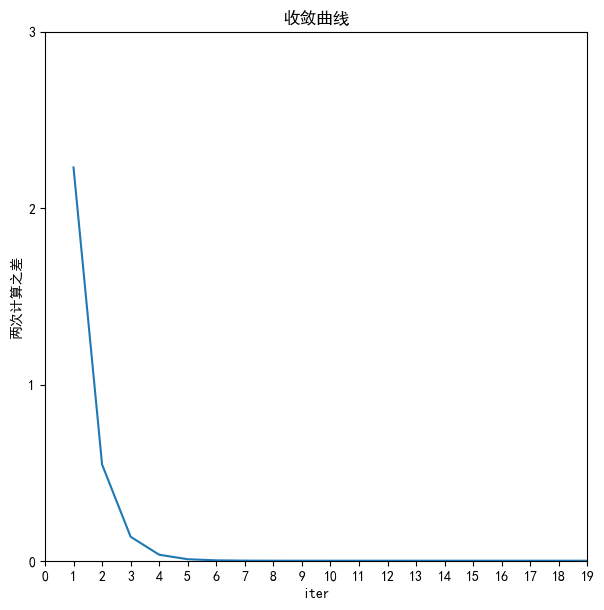

模型1耗时为： 3.326080560684204
计算结果为： 10.545780183680986


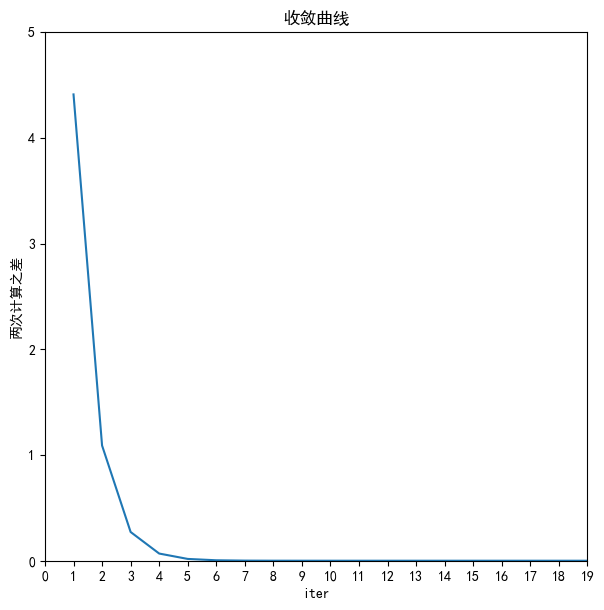

模型2耗时为： 0.002988100051879883
计算结果为： 10.545780183656298


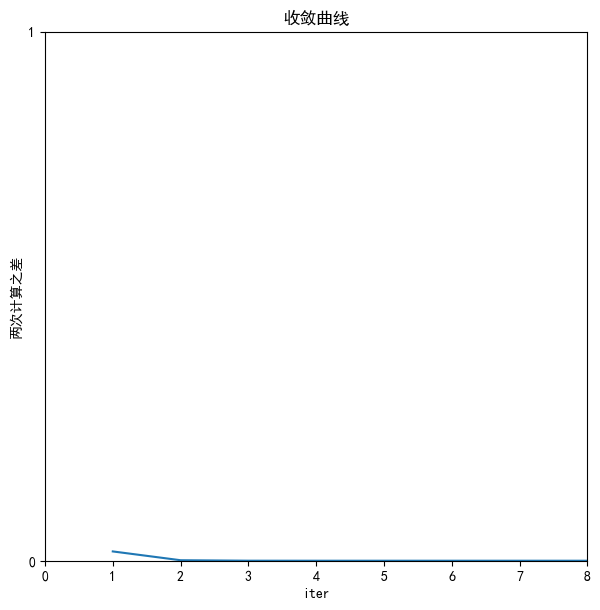

模型3耗时为： 0.0
计算结果为： 10.545781046606981


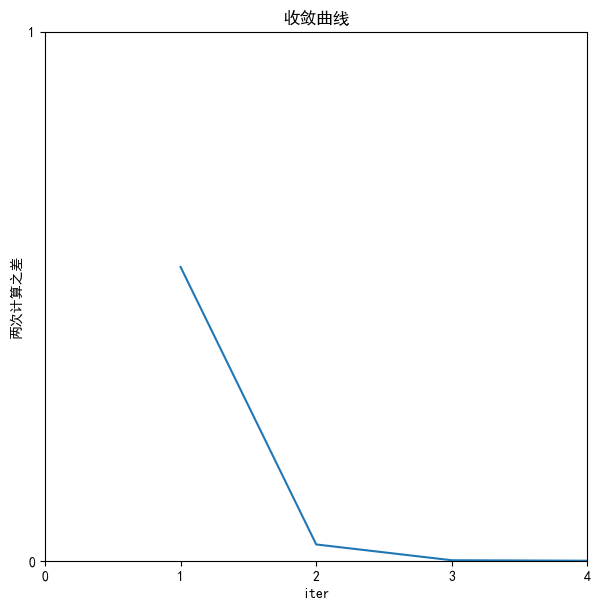

模型4耗时为： 0.2481086254119873
计算结果为： 10.515862191005173


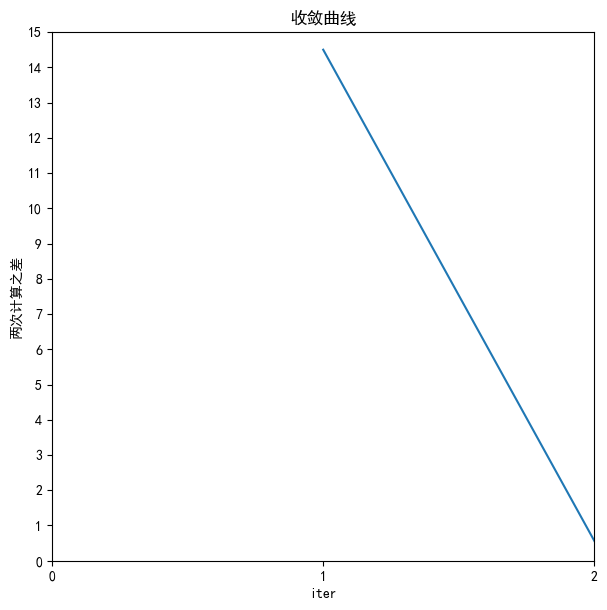

模型5耗时为： 0.000993490219116211
计算结果为： 10.545780711759019


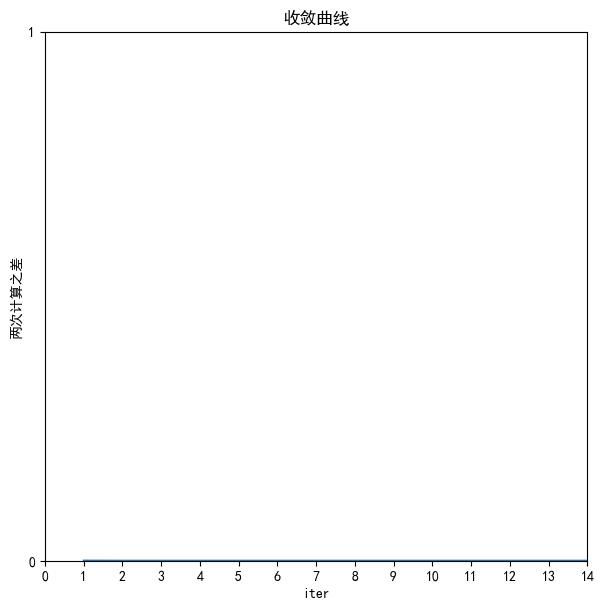

In [5]:
fun = lambda x:x**2+np.cos(x+3)
ytrue=np.sin(6)+35/3-np.sin(1)
print("精确计算结果：",ytrue)
document_1 = Document()
document_1.add_heading("小结")
document_1.add_paragraph('模型0为矩形法，模型1为梯形法，模型2为辛普森法，模型3为高斯—勒让德法，模型4为高斯法,模型5为区间高斯法')
document_1.add_picture('{}.jpg'.format(20), width=Inches(3.5))
for i in range(0,6):
    locals()['test_'+str(i)]=Intergrate(fun,-2,3,i,1E-10)
    start_time = time.time()
    iterlist,nlist,resultlist,chalist=locals()['test_'+str(i)].iteration(1,20)  
    end_time=time.time()
    deltat=end_time-start_time
    print("模型{}耗时为：".format(i),deltat)
    print("计算结果为：",resultlist[len(resultlist)-1])
    document_1.add_heading('模型{}'.format(i),level=2)
    document_1.add_paragraph("模型{}耗时为{}：".format(i,deltat))
    document_1.add_paragraph("计算结果为{}：".format(resultlist[len(resultlist)-1]))
    error=abs(resultlist[len(resultlist)-1]-ytrue)
    document_1.add_paragraph(("与精确值误差为：{}".format(error)))
    x=len(resultlist)
    locals()['table_'+str(i)]= document_1.add_table(rows=x+1, cols=3, style='Table Grid')
    hc = locals()['table_'+str(i)].rows[0].cells
    hc[0].text = 'Iteration'
    hc[1].text = 'No.of Points'
    hc[2].text = 'Result'
    for j in range(1,x+1):
        bc1 = locals()['table_'+str(i)].rows[j].cells
        bc1[0].text=str(iterlist[j-1])
        bc1[1].text=str(nlist[j-1])
        bc1[2].text=str(resultlist[j-1])
    fig=picture(iterlist,chalist,i)
    document_1.add_page_break()
document_1.add_heading('收敛图',level=2)
for i in range(0,6):
    document_1.add_paragraph('模型{}'.format(i))
    document_1.add_picture('{}.jpg'.format(i), width=Inches(3.5))
    document_1.add_paragraph('流程图')
    document_1.add_picture('{}.jpg'.format(i+6), width=Inches(3.5))
    document_1.add_page_break()
document_1.save('test.docx')